<img align="left" src = https://project.lsst.org/sites/default/files/Rubin-O-Logo_0.png width=250 style="padding: 10px"> 
<br>
<b>Using User-supplied Catalogs</b> <br>
Contact authors: Yumi Choi <br>
Last verified to run: 2024-04-XX <br>
LSST Science Piplines version: Weekly 2024_04 <br>
Container Size: small <br>
Targeted learning level: Beginner <br>

**Description:** Demonstrates a functionality for user-uploaded tables and their use in queries for DP0.3 

**Skills:** Use the TAP service, API to Gaia to make a table, and ADQL to access the DP0.3 tables.

**LSST Data Products:** TAP tables dp03_catalogs_10yr.SSObject, dp03_catalogs_10yr.MPCORB, dp03_catalogs_10yr.DiaSource, dp03_catalogs_10yr.SSSource

**Packages:** lsst.rsp.get_tap_service

**Credit:**
Developed by Yumi Choi. This tutorial is basically a combination of <a href="https://dp0-3.lsst.io/tutorials-dp0-3/portal-dp0-3-5.html">a Portal tutorial</a> by Christina Williams for user-uploaded tables and their use in queries for DP0.3 and <a href="https://github.com/rubin-dp0/cst-dev/blob/main/MLG_sandbox/DP03/gaia_hack_day_Feb2024.ipynb">a Jupyter Notebook</a> by Melissan Graham and Jeke Kurlander for accessing Gaia data and matching with DP0.3 data for solar system objects.

**Get Support:** Find DP0.3-related documentation and resources at <a href="https://dp0-3.lsst.io">dp0-3.lsst.io</a>. Questions are welcome as new topics in the <a href="https://community.lsst.org/c/support/dp0">Support - Data Preview 0 Category</a> of the Rubin Community Forum. Rubin staff will respond to all questions posted there.

## 1. Introduction

This notebook explores ...

### 1.1 Package Imports

The [matplotlib](https://matplotlib.org/) (and especially sublibrary `matplotlib.pyplot`), [numpy](http://www.numpy.org/), and [scipy](https://scipy.org/) libraries are widely used Python libraries for plotting and scientific computing, and model fitting.

The `lsst.rsp` package provides access to the Table Access Protocol (TAP) service for queries to the DP0 catalogs.

The [seaborn](https://seaborn.pydata.org/) package provides statistical data visualization with aesthetic and informative graphics.

The [sbpy](https://sbpy.org) package is an `Astropy` affiliated package for small-body planetary astronomy.

In [211]:
import numpy as np
import matplotlib.pyplot as plt
import pyvo
from astropy.table import Table
import pandas as pd
import os
import getpass

from lsst.rsp import get_tap_service

### 1.2 Define Parameters and Get a Path to My Home Directory

#### 1.2.1 Set up some plotting defaults

In [13]:
plt.style.use('tableau-colorblind10')
params = {'axes.labelsize': 15,
          'font.size': 15,
          'legend.fontsize': 12}
plt.rcParams.update(params)

Set up colors and plot symbols corresponding to the $g,r,i,z$ bands since there are no $u$ and $y$ band data in the DP0.3 catalogs. These colors are the same as those used for $g,r,i,z$ bands in Dark Energy Survey (DES) publications, and are defined in <a href="https://github.com/DarkEnergySurvey/descolors">this github repository</a>.

In [14]:
filts = ['g', 'r', 'i', 'z']
filter_colors = {'g': '#008060', 'r': '#ff4000', 'i': '#850000', 'z': '#6600cc'}

#### 1.2.2 Get a path to my home directory

In [213]:
my_username = getpass.getuser()
my_home_dir = '/home/' + my_username + '/'
print(my_home_dir)

/home/galaxyumi331/


## 2. A user-supplied table of coordinates for use in cone searches

The same example table for cone searches used in <a href="https://dp0-3.lsst.io/tutorials-dp0-3/portal-dp0-3-5.html">this Portal tutorial</a> is stored in data/ directory. 

### 2.1 Create the Rubin TAP Service Client

Get an instance of the TAP service, and assert that it exists.

In [15]:
service = get_tap_service("ssotap")
assert service is not None

### 2.2 Load a user-supplied table of coordinates and execute cone searches against the `diaSource` table using a 10'' search radius

In [214]:
df_cat_1 = pd.read_csv(my_home_dir+'portal_tut05_useruploadcat1.cat', sep='\t')
t_cat_1 = Table.from_pandas(df_cat_1)

In [215]:
query = """
    SELECT dia.ra, dia.dec, dia.midPointMjdTai, dia.ssObjectId, ut.ra, ut.dec 
    FROM dp03_catalogs_10yr.DiaSource AS dia, TAP_UPLOAD.t1 AS ut 
    WHERE CONTAINS(POINT('ICRS', dia.ra, dia.dec), CIRCLE('ICRS', ut.ra, ut.dec, 0.002777777777777778))=1
    ORDER BY dia.ssObjectId
    """

results = service.search(query, uploads={"t1" : t_cat_1}).to_table()
results

ra,dec,midPointMjdTai,ssObjectId,ra2,dec2
deg,deg,d,,,
float64,float64,float64,int64,float64,float64
349.8496645,-14.3260072,62752.10131,-9104812481934879133,349.8507502,-14.3276051
349.8499379,-14.327309,62060.12541,-6536565009333841460,349.8507502,-14.3276051
345.2034553,-15.5911322,62377.26069,-1711989975490530589,345.2016394,-15.5920336
338.014364,-14.4779895,61741.02776,2956589648411852100,338.0151274,-14.4770618
22.8351124,13.0273351,63450.38788,2956589648411852100,22.8351124,13.0273351
352.2623818,-13.4892628,61632.24295,2956589648411852100,352.2623818,-13.4892628
349.8507502,-14.3276051,61644.29927,2956589648411852100,349.8507502,-14.3276051
349.8505526,-14.3276598,61644.30017,2956589648411852100,349.8507502,-14.3276051


## 3. ADQL table join with a user-supplied table of SSObject IDs

The same example table for Object ID searches used in <a href="https://dp0-3.lsst.io/tutorials-dp0-3/portal-dp0-3-5.html">this Portal tutorial</a> is stored in data/ directory. 


### 3.1 Load a user-supplied table of SSObject IDs and 

In [216]:
df_cat_2 = pd.read_csv(my_home_dir+'portal_tut05_useruploadcat2.cat', sep='\t')
t_cat_2 = Table.from_pandas(df_cat_2)

In [217]:
query = """
    SELECT ut2.ssObjectId_user, sso.ssObjectId, sso.numObs
    FROM TAP_UPLOAD.t2 as ut2
    JOIN dp03_catalogs_10yr.SSObject as sso
    ON ut2.ssObjectId_user = sso.ssObjectId
    """

results = service.search(query, uploads={"t2" : t_cat_2}).to_table()
results

ssObjectId_user,ssObjectId,numObs
int64,int64,int32
5977535780727431144,5977535780727431144,350
4350915375550808373,4350915375550808373,322


## 4. Gaia data for DP0.3 asteroids

### 4.1 Access to Gaia database and retrieve Gaia data for main-belt asteroids

In [285]:
gaia_tap_url = 'https://gea.esac.esa.int/tap-server/tap'
gaia_tap = pyvo.dal.TAPService(gaia_tap_url)
assert gaia_tap is not None
assert gaia_tap.baseurl == gaia_tap_url

Query main-belt asteroids from the Gaia database following the population definition used by the JPL Horizons small body database query tool (https://ssd.jpl.nasa.gov/tools/sbdb_query.html): Main Belt asteroids (2.0 < `a` < 3.25 au and `q` > 1.666 au).

In [380]:
Nobs = 2000

query = """
    SELECT TOP {} denomination, num_observations, inclination, 
           eccentricity, semi_major_axis
    FROM gaiadr3.sso_orbits 
    WHERE num_observations > 100 AND semi_major_axis > 2.0 AND semi_major_axis < 3.2 AND semi_major_axis*(1-eccentricity) > 1.666
    """.format(Nobs)

pd_gaia = gaia_tap.search(query).to_table().to_pandas()

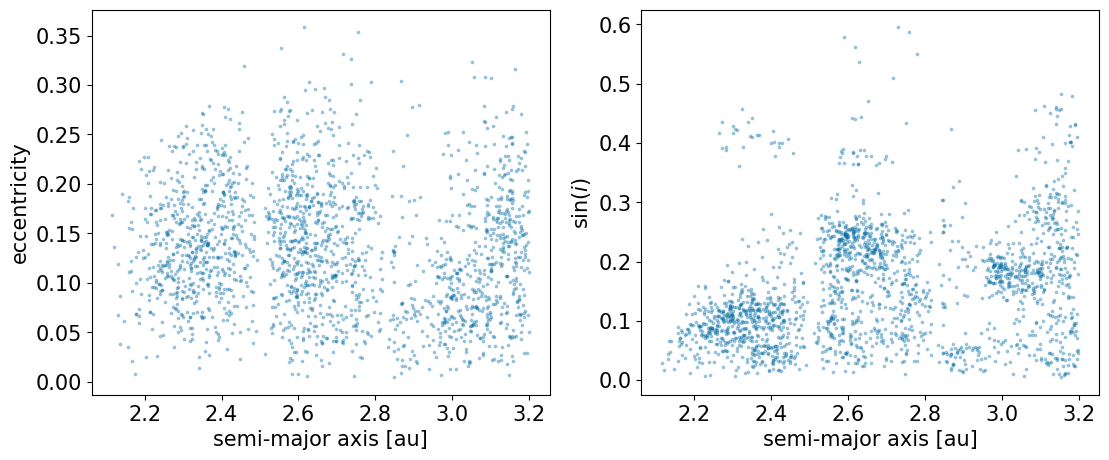

In [381]:
fig = plt.figure(figsize=(13, 5))

plt.subplot(121)
plt.scatter(pd_gaia['semi_major_axis'], pd_gaia['eccentricity'], s=3, alpha=0.3)
plt.xlabel('semi-major axis [au]')
plt.ylabel('eccentricity')

plt.subplot(122)
plt.scatter(pd_gaia['semi_major_axis'], np.sin(pd_gaia['inclination']), s=3, alpha=0.3)
plt.xlabel('semi-major axis [au]')
plt.ylabel(r'sin($i$)')
plt.show()

In [382]:
pd_gaia['mpc_desig1'] = pd_gaia['denomination'].str.replace('_', ' ').str.upper()
pd_gaia['mpc_desig2'] = pd_gaia['denomination'].str.replace('_', ' ')

In [383]:
pd_gaia

,denomination,num_observations,inclination,eccentricity,semi_major_axis,mpc_desig1,mpc_desig2
0,2000_so179,213,0.058380,0.120836,2.701355,2000 SO179,2000 so179
1,1997_wk13,106,0.087523,0.156276,2.311130,1997 WK13,1997 wk13
2,1999_jm14,103,0.098808,0.159146,2.288144,1999 JM14,1999 jm14
3,1999_ng38,175,0.083685,0.139582,2.318096,1999 NG38,1999 ng38
4,1999_gu8,265,0.113790,0.208611,2.203320,1999 GU8,1999 gu8
...,...,...,...,...,...,...,...
1995,2000_jv26,134,0.173983,0.162852,2.983560,2000 JV26,2000 jv26
1996,1994_te12,106,0.066080,0.149784,2.361802,1994 TE12,1994 te12
1997,1999_jc123,140,0.131958,0.149669,2.336503,1999 JC123,1999 jc123
1998,1999_ro80,112,0.191739,0.196486,3.120791,1999 RO80,1999 ro80


Save the result as a csv file in 'my_home_dir'.

In [384]:
pd_gaia.to_csv(my_home_dir+'gaia_mba.cat', index=False)

### 4.2 Load the saved Gaia table and Join with DP0.3 tables

In [385]:
df_cat_3 = pd.read_csv(my_home_dir+'gaia_mba.cat')
t_cat_3 = Table.from_pandas(df_cat_3)

In [386]:
t_cat_3.convert_unicode_to_bytestring()

In [387]:
query = """
    SELECT mpc.mpcDesignation, mpc.ssObjectId, ut3.denomination, ut3.mpc_desig2
    FROM dp03_catalogs_10yr.MPCORB AS mpc, TAP_UPLOAD.t3 as ut3
    WHERE mpc.mpcDesignation = ut3.mpc_desig1
    """

print(query)
pd_lsst = service.search(query, uploads={"t3" : t_cat_3}).to_table().to_pandas()


    SELECT mpc.mpcDesignation, mpc.ssObjectId, ut3.denomination, ut3.mpc_desig2
    FROM dp03_catalogs_10yr.MPCORB AS mpc, TAP_UPLOAD.t3 as ut3
    WHERE mpc.mpcDesignation = ut3.mpc_desig1
    


Select one random asteroid.

In [388]:
random_mba = pd_lsst.sample(1).to_dict(orient='list')
random_mba

{'mpcDesignation': ['1102 T-3'],
 'ssObjectId': [5845354262825855665],
 'denomination': ['1102_t-3'],
 'mpc_desig2': ['1102 t-3']}

Retrieve Gaia observations for the selected asteroid.

In [389]:
query = """
    SELECT epoch, epoch_utc, g_mag 
    FROM gaiadr3.sso_observation 
    WHERE denomination = '{}'
    """.format(random_mba['mpc_desig2'][0])

print(query)
pd_gaia_obs = gaia_tap.search(query).to_table().to_pandas()


    SELECT epoch, epoch_utc, g_mag 
    FROM gaiadr3.sso_observation 
    WHERE denomination = '1102 t-3'
    


Convert UTC observation date to MJD observation date.

In [390]:
pd_gaia_obs['epoch_jd'] = pd_gaia_obs['epoch_utc'] + 2455197.5
pd_gaia_obs['epoch_mjd'] = pd_gaia_obs['epoch_utc'] + 55197.5

Retrieve LSST observations for the selected asteroid.

In [391]:
query = """
    SELECT ssObjectId, midpointMjdTai, mag, band 
    FROM dp03_catalogs_10yr.DiaSource
    WHERE ssObjectId = '{}' AND band = 'g'
    """.format(random_mba['ssObjectId'][0])

pd_lsst_obs = service.search(query).to_table().to_pandas()

Plot `g`-band light curve for the selected asteroid.

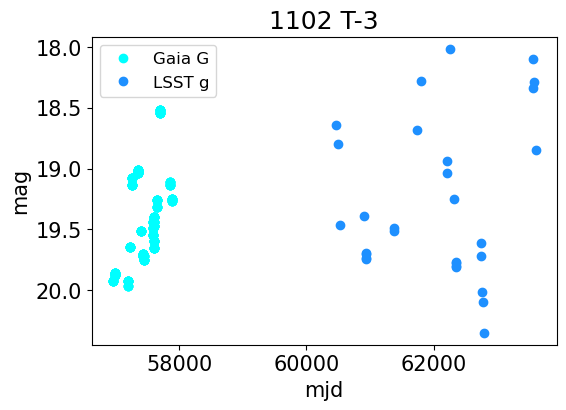

In [400]:
fig = plt.figure(figsize=(6, 4))
plt.plot(pd_gaia_obs['epoch_mjd'], pd_gaia_obs['g_mag'], 
         'o', color='cyan', label='Gaia G')
plt.plot(pd_lsst_obs['midpointMjdTai'], pd_lsst_obs['mag'], 
         'o', color='dodgerblue', label='LSST g')
ymin = min(pd_gaia_obs['g_mag'].min(),pd_lsst_obs['mag'].min())
ymax = max(pd_gaia_obs['g_mag'].max(),pd_lsst_obs['mag'].max())
plt.ylim(ymax+0.1, ymin-0.1)
plt.legend(loc='upper left')
plt.xlabel('mjd')
plt.ylabel('mag')
plt.title(random_mba['mpcDesignation'][0])
plt.show()


## 5. Excercises for the learner

1. 